# glyph-baseline

This notebook investigates how to line all the glyphs to baseline when rendering PNG.

## load the lib

In [1]:
import os
import sys

In [2]:
sys.path.insert(1, os.path.join(sys.path[0], '..', 'fonty'))

In [3]:
sys.path.append('/usr/lib/python3/dist-packages/')
import font_processing

In [4]:
font_processor = font_processing.FontProcessor('SourceCodePro-Regular.ttf', flip_v=True)

In [5]:
font_processor.save_svg_font('SourceCodePro-Regular.svg')

In [6]:
import matplotlib.pyplot as plt


            <svg
                xmlns='http://www.w3.org/2000/svg'
                xmlns:xlink='http://www.w3.org/1999/xlink'
                width='128' height='128'
                viewPort='0 0 128 128'
            >
                <rect width='128' height='128' fill='#fff' />
                <path
                    d='M114 0v656h406v-70h-322v-206h272v-71h-272v-238h332v-71h-416z'
                    fill='#000'
                    transform='translate(40.617886178861795,85.33333333333333) scale(0.06504065040650407,-0.06504065040650407)'
                />
            </svg>
        


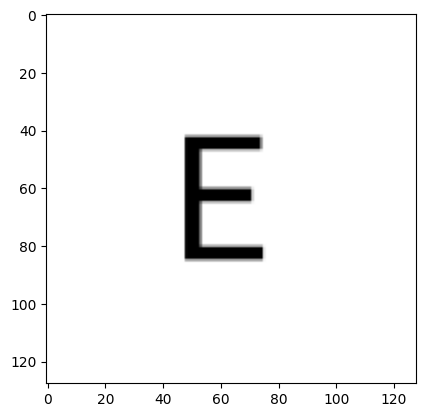

In [13]:
plt.imshow(
    font_processor.glyph2array(
        font_processor.glyphs[6],
        glyph_size_proportion=1
    )
)

## calcualte baseline

In [25]:
def calculate_transform(
    picture_height: int, picture_width: int,
    cap_height: int, vector_width: int,
    baseline_y: int = 0, baseline_x: int = 0,
    glyph_proportion: int = 1,
    flip_v: bool = False
):

    vector_ymin, vector_ymax = baseline_y, cap_height
    vector_xmin = baseline_x
    
    glyph_height = (glyph_proportion * picture_height) / (glyph_proportion + 2)
    padding_y = (picture_height - glyph_height) / 2

    glyph_ymin, glyph_ymax = padding_y, padding_y + glyph_height
    
    translating_y = glyph_ymin - vector_ymin
    scaling = (glyph_ymax - glyph_ymin) / (vector_ymax - vector_ymin)

    padding_x = (picture_width - vector_width * scaling) / 2
    glyph_xmin = (picture_width - padding_x) / 2
    glyph_width = vector_width * scaling
    translating_x = glyph_xmin - vector_xmin + (picture_width - glyph_width) / 2
    print('glyph_xmin', glyph_xmin, 'picture_width', picture_width, 'glyph_width', glyph_width)

    return (
        (picture_width - translating_x, picture_height - translating_y),
        (scaling, scaling if not flip_v else -scaling)
    )

### calculating experiments

In [29]:
[(i, glyph) for i, glyph in enumerate(font_processor.glyphs) if glyph.glyph_name=='AEacute']

[(78,
  Glyph(d='M231 377l-46 -119h132v332h-3q-20 -54 -41.5 -107t-41.5 -106zM-1 0l264 656h319v-70h-189v-205h147v-71h-147v-239h198v-71h-274v191h-158l-73 -191h-87zM391 697l-36 42l141 128l47 -55z', glyph_name='AEacute', unicode='Ǽ', attrs={}))]

(591.0, -1.0, 867.0, 0.0)

            <svg
                xmlns='http://www.w3.org/2000/svg'
                xmlns:xlink='http://www.w3.org/1999/xlink'
                width='128' height='128'
                viewPort='0 0 128 128'
            >
                <rect width='128' height='128' fill='#fff' />
                <path
                    d='M231 377l-46 -119h132v332h-3q-20 -54 -41.5 -107t-41.5 -106zM-1 0l264 656h319v-70h-189v-205h147v-71h-147v-239h198v-71h-274v191h-158l-73 -191h-87zM391 697l-36 42l141 128l47 -55z'
                    fill='#000'
                    transform='translate(20.44752,128.0) scale(0.14764,-0.14764)'
                />
            </svg>
        


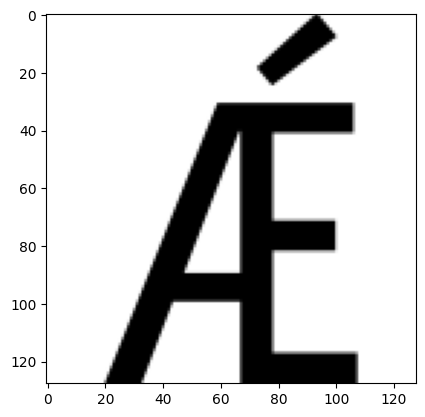

In [31]:
plt.imshow(
    font_processor.glyph2array(font_processor.glyphs[78])
)

In [30]:
font_processor.glyphs[78]

Glyph(d='M231 377l-46 -119h132v332h-3q-20 -54 -41.5 -107t-41.5 -106zM-1 0l264 656h319v-70h-189v-205h147v-71h-147v-239h198v-71h-274v191h-158l-73 -191h-87zM391 697l-36 42l141 128l47 -55z', glyph_name='AEacute', unicode='Ǽ', attrs={})

In [32]:
calculate_transform(
    picture_height=128, picture_width=128,
    cap_height=font_processor._font.capHeight, vector_width=867,
    baseline_y=0, glyph_proportion=1,
    flip_v=True
)

glyph_xmin 46.09756097560976 picture_width 128 glyph_width 56.39024390243903


((46.09756097560975, 85.33333333333333),
 (0.06504065040650407, -0.06504065040650407))

In [ ]:
font_processor._font

In [22]:
font_processor._font.capHeight

656.0

In [25]:
picture_height = 128

In [33]:
p = 2

In [45]:
glyph_height = (p * picture_height) / (p + 2)

glyph_height

64.0

In [46]:
gutter = (picture_height - glyph_height) / 2

gutter

32.0

In [47]:
vector_ymin, vector_ymax = 0, font_processor._font.capHeight

vector_ymin, vector_ymax

(0, 656.0)

In [50]:
glyph_ymin, glyph_ymax = gutter, gutter + glyph_height

glyph_ymin, glyph_ymax

(32.0, 96.0)

In [51]:
translate_y = glyph_ymin - vector_ymin

translate_y

32.0

In [52]:
scale_y = (glyph_ymax - glyph_ymin) / (vector_ymax - vector_ymin)

scale_y

0.0975609756097561

In [53]:
def transformation(x):
    return x * scale_y + translate_y

In [56]:
transformation(656)

96.0

In [62]:
{
    attr: getattr(font_processor._font.math, attr)
    for attr in dir(font_processor._font.math)
}


{'AccentBaseHeight': 486,
 'AxisHeight': 330,
 'DelimitedSubFormulaMinHeight': 1500,
 'DisplayOperatorMinHeight': 0,
 'FlattenedAccentBaseHeight': 656,
 'FractionDenominatorDisplayStyleGapMin': 150,
 'FractionDenominatorDisplayStyleShiftDown': 0,
 'FractionDenominatorGapMin': 50,
 'FractionDenominatorShiftDown': 0,
 'FractionNumeratorDisplayStyleGapMin': 150,
 'FractionNumeratorDisplayStyleShiftUp': 0,
 'FractionNumeratorGapMin': 50,
 'FractionNumeratorShiftUp': 0,
 'FractionRuleThickness': 50,
 'LowerLimitBaselineDropMin': 0,
 'LowerLimitGapMin': 0,
 'MathLeading': 0,
 'MinConnectorOverlap': 20,
 'OverbarExtraAscender': 50,
 'OverbarRuleThickness': 50,
 'OverbarVerticalGap': 150,
 'RadicalDegreeBottomRaisePercent': 60,
 'RadicalDisplayStyleVerticalGap': 171,
 'RadicalExtraAscender': 50,
 'RadicalKernAfterDegree': -555,
 'RadicalKernBeforeDegree': 277,
 'RadicalRuleThickness': 50,
 'RadicalVerticalGap': 50,
 'ScriptPercentScaleDown': 80,
 'ScriptScriptPercentScaleDown': 60,
 'SkewedFra

In [65]:
{
    attr: getattr(font_processor._font.canonicalContours(), attr)
    for attr in dir(font_processor._font.canonicalContours())
}


{'__class__': fontforge.font,
 '__contains__': <method-wrapper '__contains__' of fontforge.font object at 0x7f1768612930>,
 '__delattr__': <method-wrapper '__delattr__' of fontforge.font object at 0x7f1768612930>,
 '__dir__': <function font.__dir__()>,
 '__doc__': 'FontForge Font object',
 '__eq__': <method-wrapper '__eq__' of fontforge.font object at 0x7f1768612930>,
 '__format__': <function font.__format__(format_spec, /)>,
 '__ge__': <method-wrapper '__ge__' of fontforge.font object at 0x7f1768612930>,
 '__getattribute__': <method-wrapper '__getattribute__' of fontforge.font object at 0x7f1768612930>,
 '__getitem__': <method-wrapper '__getitem__' of fontforge.font object at 0x7f1768612930>,
 '__gt__': <method-wrapper '__gt__' of fontforge.font object at 0x7f1768612930>,
 '__hash__': <method-wrapper '__hash__' of fontforge.font object at 0x7f1768612930>,
 '__init__': <method-wrapper '__init__' of fontforge.font object at 0x7f1768612930>,
 '__init_subclass__': <function font.__init_su

In [64]:
font_processor._font.canonicalContours()

<fontforge.font at 0x0x7f1768612930 "SourceCodePro-Regular">